# **BHEL Stock Price Prediction**
> 🧬 We will predict the Stock Price of BHEL using Multivariate Time Series - `Bharat Heavy Electrical Limited`

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Exploring Data

In [2]:
import yfinance as yf
import pandas as pd

def get_stock_data_to_csv(stock_code, start_date, end_date, file_path):
    # Fetch Apple stock data
    data = yf.download(stock_code, start=start_date, end=end_date)

    # Save the data to a CSV file
    data.to_csv(file_path)

# Define the date range and file path
start_date = "2000-09-01"
end_date = "2023-09-01"
file_path = "BHEL.csv"  # Update this with your desired file path

# Call the function to save the data
get_stock_data_to_csv('BHEL.NS', start_date, end_date, file_path)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df = pd.read_csv('BHEL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-01,8.883333,8.883333,8.883333,8.883333,6.725233,0
1,2000-09-04,8.993333,9.040000,8.666666,8.696666,6.583913,4512600
2,2000-09-05,8.793333,9.590000,8.710000,9.476666,7.174422,13891965
3,2000-09-06,9.333333,9.390000,9.066666,9.156666,6.932160,4390650
4,2000-09-07,9.073333,9.506666,9.073333,9.356666,7.083574,3831240


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5731,2023-08-25,107.650002,109.199997,105.000000,105.250000,105.250000,26019715
5732,2023-08-28,106.800003,110.500000,106.050003,109.550003,109.550003,41415363
5733,2023-08-29,109.800003,115.599998,109.050003,114.650002,114.650002,65979986
5734,2023-08-30,115.500000,119.500000,114.000000,118.699997,118.699997,80676360
5735,2023-08-31,120.900002,122.000000,118.699997,121.250000,121.250000,68540952


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5736 non-null   datetime64[ns]
 1   Open       5736 non-null   float64       
 2   High       5736 non-null   float64       
 3   Low        5736 non-null   float64       
 4   Close      5736 non-null   float64       
 5   Adj Close  5736 non-null   float64       
 6   Volume     5736 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 313.8 KB


In [7]:
df.shape

(5736, 7)

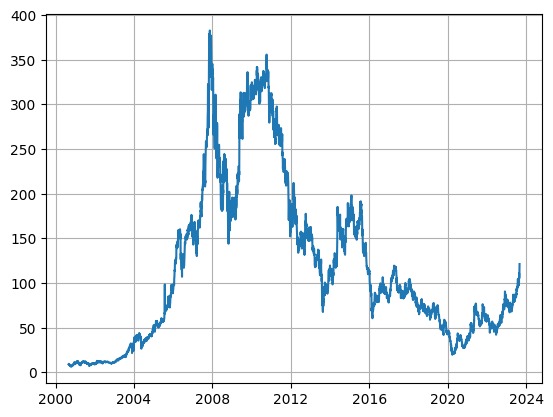

In [8]:
plt.plot(df['Date'], df['Close'])
plt.grid()
plt.show()

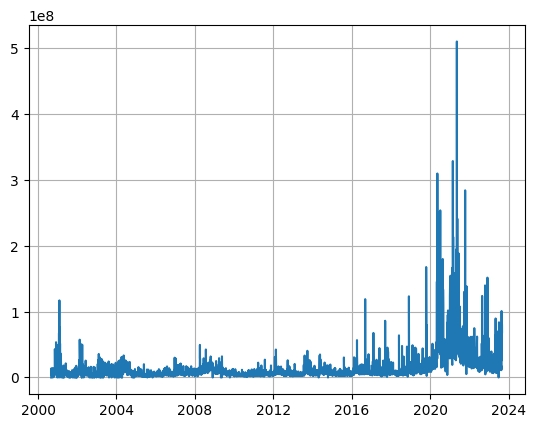

In [9]:
plt.plot(df['Date'], df['Volume'])
plt.grid()
plt.show()

In [10]:
# move the 'Close' column to the first position in the DataFrame
close_col = df.pop('Close')
df.insert(1, 'Close', close_col)

In [11]:
df.head()

,Date,Close,Open,High,Low,Adj Close,Volume
0,2000-09-01,8.883333,8.883333,8.883333,8.883333,6.725233,0
1,2000-09-04,8.696666,8.993333,9.040000,8.666666,6.583913,4512600
2,2000-09-05,9.476666,8.793333,9.590000,8.710000,7.174422,13891965
3,2000-09-06,9.156666,9.333333,9.390000,9.066666,6.932160,4390650
4,2000-09-07,9.356666,9.073333,9.506666,9.073333,7.083574,3831240


In [12]:
X = df.drop(['Date', 'Volume'], axis=1).values

In [13]:
X

array([[  8.88333321,   8.88333321,   8.88333321,   8.88333321,
          6.7252326 ],
       [  8.69666576,   8.99333286,   9.03999996,   8.66666603,
          6.58391285],
       [  9.47666645,   8.79333305,   9.59000015,   8.71000004,
          7.17442179],
       ...,
       [114.65000153, 109.80000305, 115.59999847, 109.05000305,
        114.65000153],
       [118.69999695, 115.5       , 119.5       , 114.        ,
        118.69999695],
       [121.25      , 120.90000153, 122.        , 118.69999695,
        121.25      ]])

In [14]:
X.shape

(5736, 5)

## MinMax Scale the Data

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled

array([[0.00622973, 0.0060489 , 0.00559993, 0.00646813, 0.00600911],
       [0.00573348, 0.00633989, 0.00600799, 0.00588012, 0.00553043],
       [0.0078071 , 0.00581083, 0.00744053, 0.00599772, 0.00753061],
       ...,
       [0.2874094 , 0.27300303, 0.28355618, 0.27831052, 0.37157481],
       [0.29817627, 0.28808119, 0.29371419, 0.29174432, 0.38529307],
       [0.30495543, 0.30236577, 0.30022574, 0.30449964, 0.39393051]])

## Splitting into Training and Testing Sets

In [17]:
train_size = int(len(X_scaled)*0.9)
train_data = X_scaled[:train_size]
test_data = X_scaled[train_size:]

In [18]:
train_data.shape, test_data.shape

((5162, 5), (574, 5))

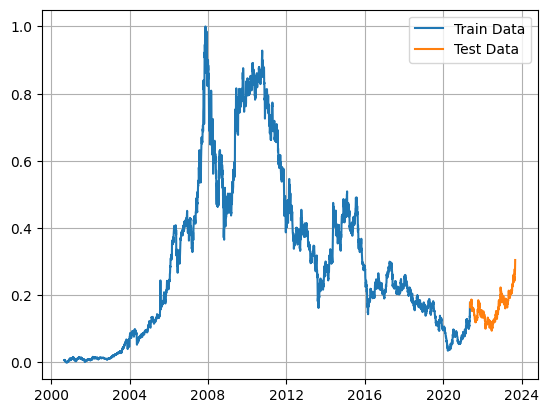

In [19]:
plt.plot(df['Date'][:train_size], train_data[:, 0], label='Train Data')
plt.plot(df['Date'][train_size:], test_data[:, 0], label='Test Data')
plt.legend()
plt.grid()
plt.show()

## Converting into Windowed Dataset

In [20]:
def make_windowed_datasets(data, window_size=7, horizon_size=1):
  X = []
  y = []
  for i in range(len(data)-(window_size+horizon_size)):
    X.append(data[i:i+window_size, :])
    y.append(data[i+window_size, 0])
  return np.array(X), np.array(y)

In [21]:
X_train, y_train = make_windowed_datasets(train_data)
X_test, y_test = make_windowed_datasets(test_data)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5154, 7, 5), (5154,), (566, 7, 5), (566,))

In [23]:
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))
y_train.shape, y_test.shape

((5154, 1), (566, 1))

## Model Building

In [24]:
import os
# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name):
  return tf.keras.callbacks.ModelCheckpoint(filepath=f"./model_experiments/{model_name}/", # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [26]:
model1 = Sequential()
model1.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(LSTM(128, activation='relu', return_sequences=True))
model1.add(LSTM(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1))

In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            68608     
                                                                 
 lstm_1 (LSTM)               (None, 7, 128)            131584    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 251,713
Trainable params: 251,713
Non-trainable params: 0
_________________________________________________________________


In [28]:
model1.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mse']
)

In [29]:
history1 = model1.fit(X_train, y_train,
                      epochs=50,
                      validation_data=(X_test, y_test),
                      callbacks=[create_model_checkpoint(model_name='LSTM_model1')]
                      )

Epoch 1/50
162/162 [==============================] - 38s 141ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 9.3130e-05 - val_mse: 9.3130e-05
Epoch 2/50
162/162 [==============================] - 9s 56ms/step - loss: 5.3350e-04 - mse: 5.3350e-04 - val_loss: 1.1583e-04 - val_mse: 1.1583e-04
Epoch 3/50
162/162 [==============================] - 17s 103ms/step - loss: 5.2724e-04 - mse: 5.2724e-04 - val_loss: 9.6006e-05 - val_mse: 9.6006e-05
Epoch 4/50
162/162 [==============================] - 16s 96ms/step - loss: 4.6855e-04 - mse: 4.6855e-04 - val_loss: 4.7758e-04 - val_mse: 4.7758e-04
Epoch 5/50
162/162 [==============================] - 15s 90ms/step - loss: 8.4800e-04 - mse: 8.4800e-04 - val_loss: 1.1269e-04 - val_mse: 1.1269e-04
Epoch 6/50
162/162 [==============================] - 23s 145ms/step - loss: 4.6121e-04 - mse: 4.6121e-04 - val_loss: 8.4253e-05 - val_mse: 8.4253e-05
Epoch 7/50
162/162 [==============================] - 15s 91ms/step - loss: 4.4621e-04 - mse: 4.4621e-04 -

## Model Evaluation

In [30]:
model1.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 2.8318e-05 - mse: 2.8318e-05


[2.8317781470832415e-05, 2.8317781470832415e-05]

In [32]:
model1 = tf.keras.models.load_model('/content/model_experiments/LSTM_model1/')
model1.evaluate(X_test, y_test)

18/18 [==============================] - 1s 7ms/step - loss: 2.8318e-05 - mse: 2.8318e-05


[2.8317781470832415e-05, 2.8317781470832415e-05]

In [33]:
model1.evaluate(X_train, y_train)

162/162 [==============================] - 1s 6ms/step - loss: 1.2436e-04 - mse: 1.2436e-04


[0.0001243589213117957, 0.0001243589213117957]

In [34]:
y_preds = tf.squeeze(model1.predict(X_test))
y_preds[:5]

18/18 [==============================] - 1s 7ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.17708723, 0.1756981 , 0.17824572, 0.17796877, 0.1774274 ],
      dtype=float32)>

In [35]:
from sklearn.metrics import r2_score

y_test = tf.squeeze(y_test) # because y_test intially was in the shape of (566, 1)

# Make sure float32 (for metric calculations)
y_test = tf.cast(y_test, dtype=tf.float32)
y_preds = tf.cast(y_preds, dtype=tf.float32)

# Calculate various metrics
mae = tf.keras.metrics.mean_absolute_error(y_test, y_preds)
mse = tf.keras.metrics.mean_squared_error(y_test, y_preds) # puts and emphasis on outliers (all errors get squared)
rmse = tf.sqrt(mse)
mape = tf.keras.metrics.mean_absolute_percentage_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

print(f"""
MAE : {mae.numpy()}
MSE : {mse.numpy()}
RMSE : {rmse.numpy()}
MAPE : {mape.numpy()}
R2 Score : {r2}""")


MAE : 0.0038718865253031254
MSE : 2.8317785108811222e-05
RMSE : 0.0053214458748698235
MAPE : 2.4459357261657715
R2 Score : 0.9810540230805861


<Axes: >

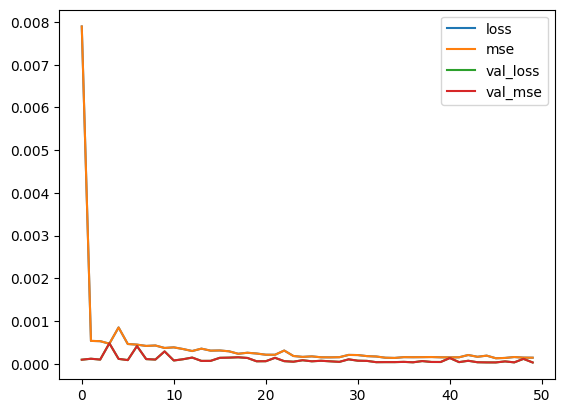

In [36]:
pd.DataFrame(history1.history).plot()

## Visualizing our Predictions on Test Data

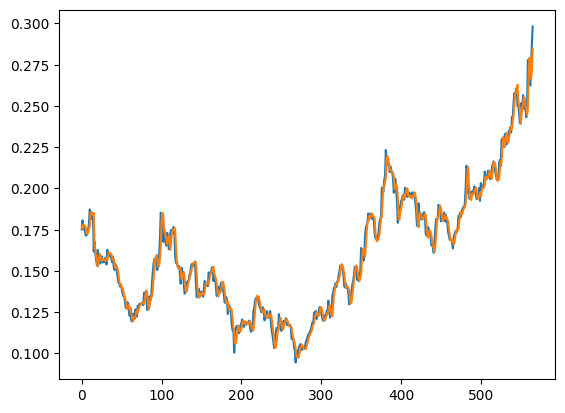

In [37]:
plt.plot(y_test)
plt.plot(y_preds)

In [59]:
y_preds = scaler.inverse_transform(np.repeat(tf.expand_dims(y_preds, axis=1), X_scaled.shape[-1], axis=-1))[:, 0]
y_test = scaler.inverse_transform(np.repeat(tf.expand_dims(y_test, axis=1), X_scaled.shape[-1], axis=-1))[:, 0]

In [60]:
con = np.concatenate((tf.expand_dims(y_test, axis=1), tf.expand_dims(y_preds, axis=1)), axis=1)
con[:20]

array([[72.45    , 73.151955],
       [74.5     , 72.629425],
       [72.5     , 73.58772 ],
       [73.3     , 73.48354 ],
       [71.9     , 73.27991 ],
       [71.05    , 72.68134 ],
       [71.1     , 71.548744],
       [72.25    , 71.381775],
       [72.35    , 71.74006 ],
       [73.9     , 72.45196 ],
       [77.      , 73.35366 ],
       [75.75    , 75.85317 ],
       [74.8     , 76.47278 ],
       [75.8     , 76.031685],
       [76.2     , 75.76816 ],
       [67.4     , 76.16529 ],
       [69.65    , 69.29483 ],
       [67.      , 67.83791 ],
       [65.5     , 66.39311 ],
       [64.25    , 65.24772 ]], dtype=float32)

## Saving the model

In [61]:
model1.save('LSTM_model.h5')